In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\saurav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("output.csv")

c:\Users\saurav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(855969, 73)

0    809502
1     46467
Name: default_ind, dtype: int64


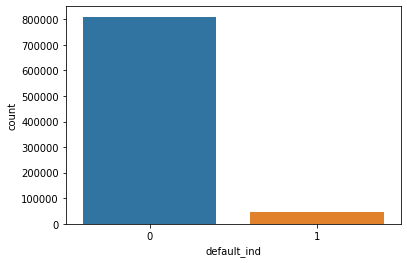

In [5]:
# default column is our target column.
sns.countplot('default_ind',data=df)
print(df.default_ind.value_counts())
# lokking into value count we can conclude that it is an imbalanced data.
# need to fix the imbalance issue first.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
#function to find missing Value
# it will generate a dataframe for all the missing values as a percentage and total NA values.
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['In Total', 'In Percentage'])
    return(missing_data)

In [8]:
# missing data calling function
missing_data(df)

,In Total,In Percentage
dti_joint,855529,0.999486
annual_inc_joint,855527,0.999484
verification_status_joint,855527,0.999484
il_util,844360,0.986438
mths_since_rcnt_il,843035,0.984890
...,...,...
out_prncp,0,0.000000
out_prncp_inv,0,0.000000
member_id,0,0.000000
total_pymnt_inv,0,0.000000


In [9]:
df.shape

(855969, 73)

In [10]:
# copy dataframe to a dummy dataframe for basic cleaning of data.
df_1 = df
df_1.shape

(855969, 73)

In [11]:
# removing columns with more Null values like of somthing >(855969/2) 
lis_df_1=df_1.isnull().sum()
for i in range(len(lis_df_1)):
    if lis_df_1[i]>(855969/2):
        del df_1['{}'.format(lis_df_1.index[i])]

In [12]:
df_1.shape

(855969, 52)

In [13]:
missing_data(df_1)

,In Total,In Percentage
next_pymnt_d,252971,0.295538
total_rev_hi_lim,67313,0.078640
tot_cur_bal,67313,0.078640
tot_coll_amt,67313,0.078640
emp_title,49443,0.057763
emp_length,43061,0.050307
last_pymnt_d,8862,0.010353
revol_util,446,0.000521
collections_12_mths_ex_med,56,0.000065
last_credit_pull_d,50,0.000058


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          855969 non-null  int64  
 1   member_id                   855969 non-null  int64  
 2   loan_amnt                   855969 non-null  float64
 3   funded_amnt                 855969 non-null  float64
 4   funded_amnt_inv             855969 non-null  float64
 5   term                        855969 non-null  object 
 6   int_rate                    855969 non-null  float64
 7   installment                 855969 non-null  float64
 8   grade                       855969 non-null  object 
 9   sub_grade                   855969 non-null  object 
 10  emp_title                   806526 non-null  object 
 11  emp_length                  812908 non-null  object 
 12  home_ownership              855969 non-null  object 
 13  annual_inc    

Term 

In [16]:
df_1.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

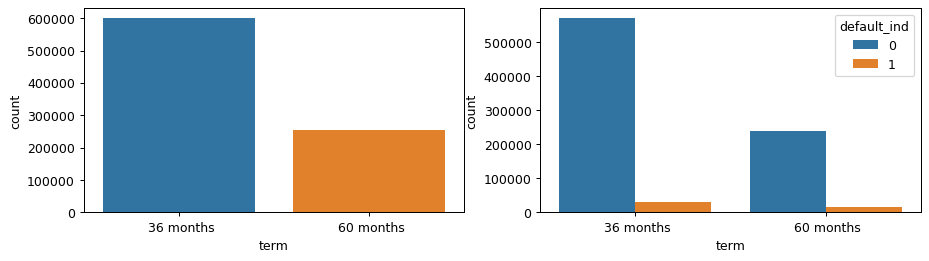

In [17]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(df_1['term'],ax=ax1)
sns.countplot('term',hue='default_ind',data=df_1,ax=ax2)

In [18]:
df_1.term=df_1.term.str.extract('(\d+)')
term_list={'36':0,'60':1}
df_1.term=[term_list[item]for item in df_1.term]
df_1.term.value_counts()

0    600221
1    255748
Name: term, dtype: int64

Grade

In [19]:
df_1.grade.value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

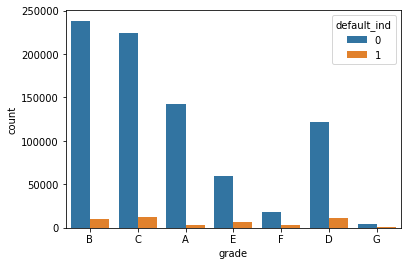

In [20]:
sns.countplot('grade',hue='default_ind',data=df_1)

In [21]:
grade_list={'A':1,'B':2,'C':3,'D':4,'E':4,'F':5,'G':6}
df_1.grade=[grade_list[item]for item in df_1.grade]
df_1.grade.value_counts()

2    247998
3    236855
4    199250
1    145665
5     21328
6      4873
Name: grade, dtype: int64

Sub Grade

In [22]:
df_1.sub_grade.value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df_1['sub_grade'] = le.fit_transform(df_1['sub_grade'])
df_1.sub_grade.value_counts()

7     54958
8     54116
10    51588
11    50457
12    48337
6     47589
9     47333
13    46941
5     44002
4     43957
14    39532
15    34667
3     33991
16    28385
17    25289
18    24253
2     23095
0     22516
1     22106
19    20208
20    17230
21    15994
22    13294
23    11011
24     8919
25     6702
26     4979
27     4099
28     3168
29     2380
30     1698
31     1259
32      877
33      570
34      469
Name: sub_grade, dtype: int64

In [23]:
df_1.corr()['default_ind']

id                           -0.219832
member_id                    -0.220181
loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
term                          0.031378
int_rate                      0.155037
installment                   0.004753
grade                         0.120296
annual_inc                   -0.037066
dti                           0.004429
delinq_2yrs                  -0.009186
inq_last_6mths                0.074407
open_acc                     -0.021698
pub_rec                      -0.019607
revol_bal                    -0.020696
revol_util                    0.044497
total_acc                    -0.021087
out_prncp                    -0.225960
out_prncp_inv                -0.225959
total_pymnt                  -0.039220
total_pymnt_inv              -0.040232
total_rec_prncp              -0.090336
total_rec_int                 0.046050
total_rec_late_fee            0.140760
recoveries               